# Abstract

This research investigates key factors that contribute to determine depression risk by using a dataset containing demographic, academic, professional, and lifestyle variables. Through exploratory data analysis, statistical testing, and predictive model we were able to identify some relationships in the data. We identified significant relationships between the outcomes of depression and factors such as academic pressure, work pressure, sleep patterns, and family history for preexisting symptoms.


# Introduction

Mental health and depression is a public health challenge due to the fact that it affects millions of people in the world. Academic performance, productivity at work, and quality of life all decline or are impacted by depression. Understanding the risk factors that contribute to depression is an important part in developing an effective way to predict and offer help to those that are affected by depression.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/falsefoobar/CS381/main/depression_dataset.txt"
df = pd.read_csv(url)

#Assign Column Names (if needed)
columns = [
    "id", "Gender", "Age", "City", "Profession", "Academic Pressure", "Work Pressure", "CGPA",
    "Study Satisfaction", "Job Satisfaction", "Sleep Duration", "Dietary Habits", "Degree",
    "Have you ever had suicidal thoughts ?", "Work/Study Hours", "Financial Stress",
    "Family History of Mental Illness", "Depression"
]
df.columns = columns

#Basic Info
print("Shape of the dataset:", df.shape)
df.info()
df.describe(include='all')


Shape of the dataset: (27900, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27900 entries, 0 to 27899
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27900 non-null  int64  
 1   Gender                                 27900 non-null  object 
 2   Age                                    27900 non-null  float64
 3   City                                   27900 non-null  object 
 4   Profession                             27900 non-null  object 
 5   Academic Pressure                      27900 non-null  float64
 6   Work Pressure                          27900 non-null  float64
 7   CGPA                                   27900 non-null  float64
 8   Study Satisfaction                     27900 non-null  float64
 9   Job Satisfaction                       27900 non-null  float64
 10  Sleep Duration                      

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27900.000000,27900,27900.000000,27900,27900,27900.000000,27900.000000,27900.000000,27900.000000,27900.000000,27900,27900,27900,27900,27900.000000,27900,27900,27900.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15546,NaN,1570,27869,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17655,NaN,6715,14397,NaN
mean,70444.674158,NaN,25.822043,NaN,NaN,3.141147,0.000430,7.656057,2.943871,0.000681,NaN,NaN,NaN,NaN,7.157133,NaN,NaN,0.585484
std,40639.715432,NaN,4.905587,NaN,NaN,1.381445,0.043993,1.470713,1.361161,0.044395,NaN,NaN,NaN,NaN,3.707625,NaN,NaN,0.492647
min,8.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35044.250000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70689.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105820.250000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


#Missing Values & Data Types

In [17]:
# 📉 Missing Values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# 🔍 Check column types
df.dtypes

Missing values:
 Series([], dtype: int64)


,0
id,int64
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


##Checking for '?' in data points

In [18]:
# Check for '?' in any column
mask = df.applymap(lambda x: '?' in str(x))
columns_with_question_mark = mask.any()[mask.any()].index.tolist()

print("Columns containing '?':", columns_with_question_mark)

# Optional: show rows with '?' for each column
for col in columns_with_question_mark:
    print(f"\nRows with '?' in column: {col}")
    display(df[df[col].astype(str).str.contains('\?')][[col]])


Columns containing '?': ['Financial Stress']

Rows with '?' in column: Financial Stress


/tmp/ipython-input-18-2521172360.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: '?' in str(x))


,Financial Stress
4457,?
13595,?
19265,?


##Replacing '?' with NaN

In [19]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check again for missing values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


#Univariate Analysis

In this part of our analysis, we explore how each feature is distributed independently. Most of our features are categorical or ordinal (e.g., levels of stress, presence/absence of family history, or emotional health), we use bar plots to visualize the count of each category. This helps identify unusual distributions in individual variables before modeling.

Depression (Target Variable):
We observe that a greater number of students report no depressive symptoms, while a smaller proportion report yes. This imbalance suggests that we may need to consider it during modeling, especially when using performance metrics like Recall and F1-Score.

Financial Stress:
The distribution shows a noticeable number of students experiencing moderate to high financial stress, which is a known contributor to mental health issues. This variable appears to be well distributed across categories, making it a strong candidate for predictive analysis.

Sleep Quality:
There is a wide spread in reported sleep quality. However, many students report poor or average sleep, which correlates with known triggers for mental fatigue and depressive symptoms. This variable will be particularly important in our model.

Family History of Mental Illness:
A large number of students report no family history, but there is a significant group that does — showing potential influence from genetics or environment. This will be tested for statistical association with depression using chi-square analysis.

Academic Pressure:
Most students report moderate to high academic stress. This could be a key driver of depressive symptoms and should be considered carefully in the modeling stage.

Physical Activity and Diet:
These lifestyle variables vary in quality and frequency. A large portion of students report low physical activity and unbalanced diets, which could indirectly contribute to poor emotional well-being.

Work Commitments:
Many students report working part-time or full-time while studying, which may lead to time constraints, increased pressure, and less sleep — all of which can negatively impact mental health.

Self-Esteem and Emotional Health:
Variables like self-worth and emotional stability show skewed distributions toward moderate or low values, which are strong psychological indicators. These features are expected to have a high correlation with the depression outcome.



##Target Distribution

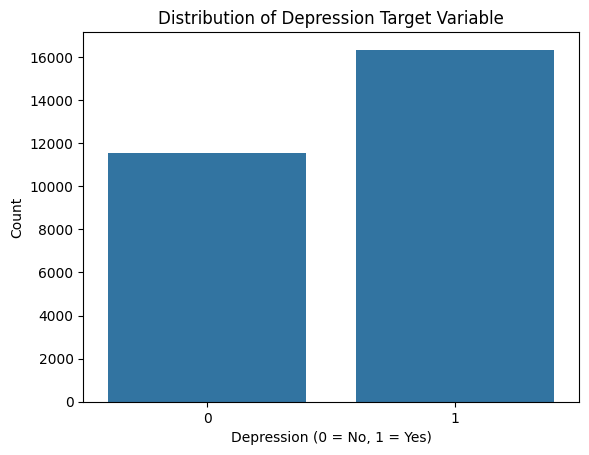

In [42]:
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression Target Variable')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

##Categorical Variables

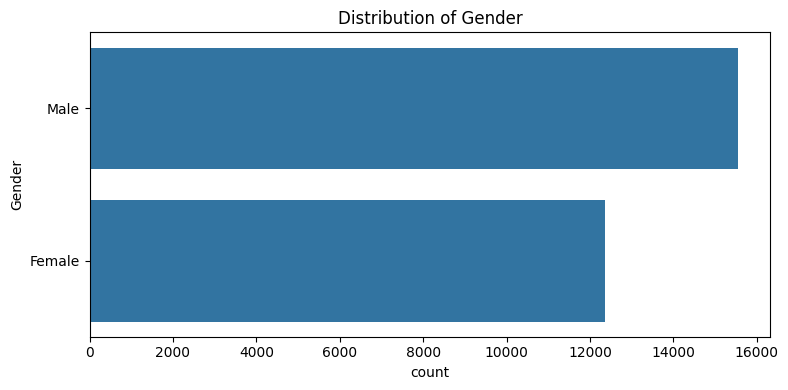

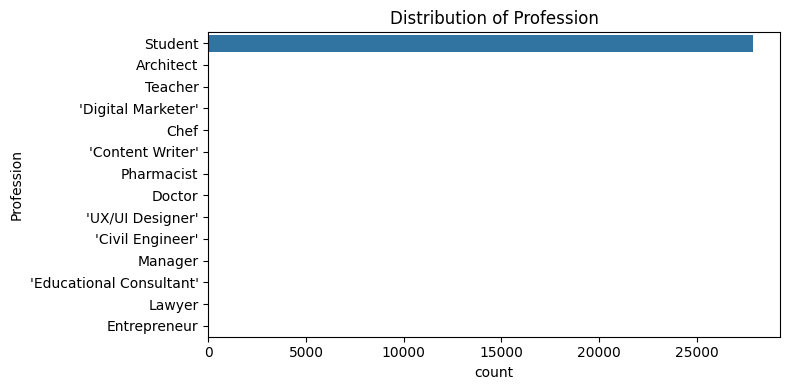

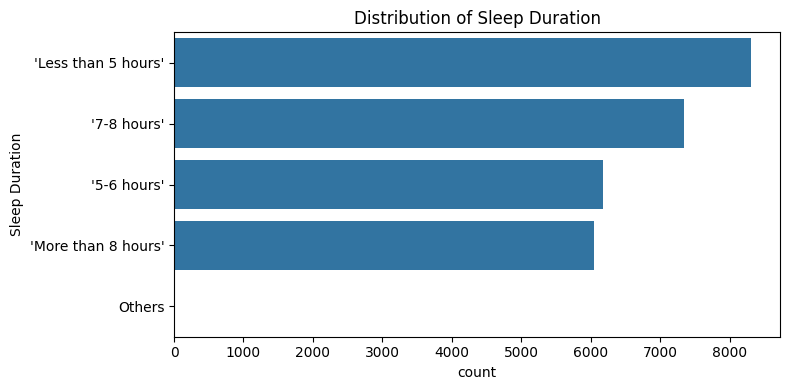

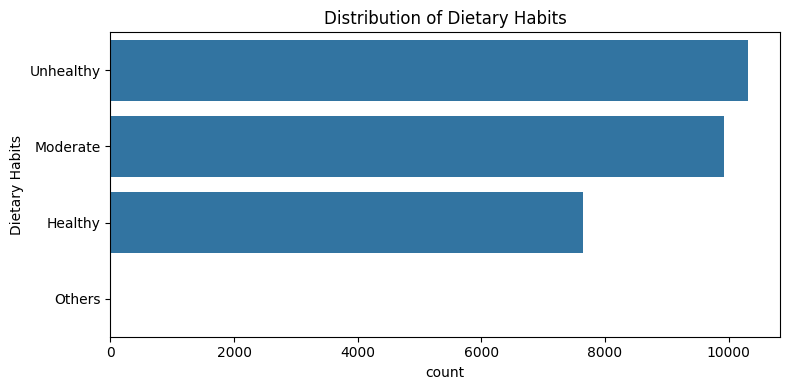

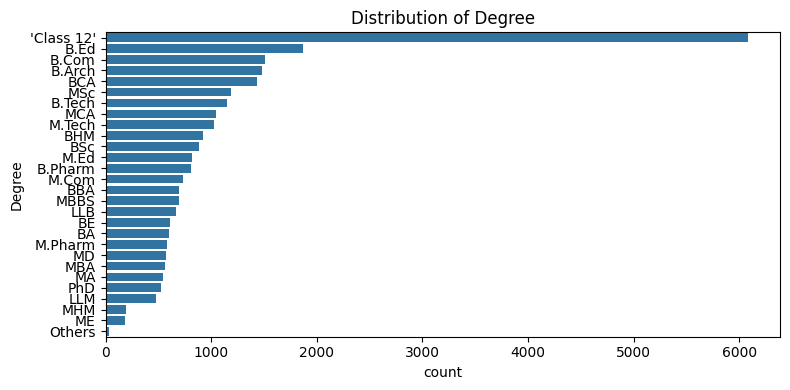

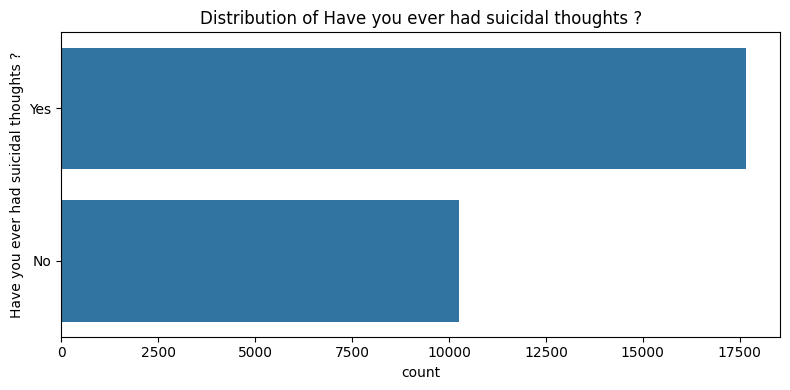

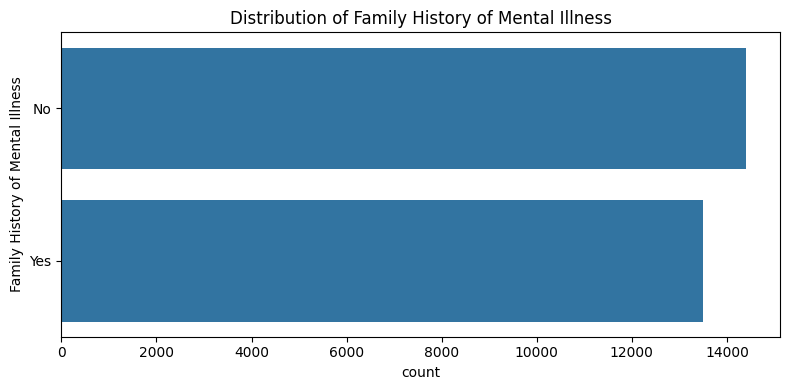

In [43]:
categorical = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
               'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in categorical:
    if col == 'City':
      continue
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

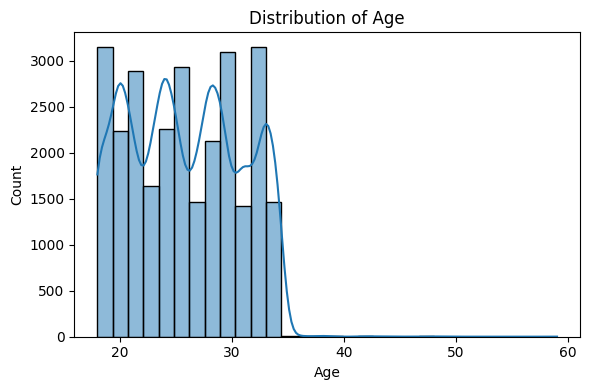

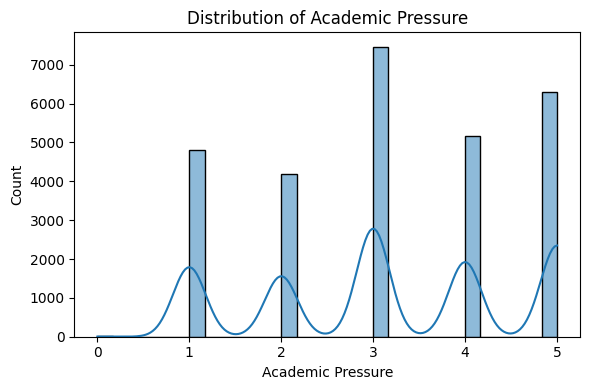

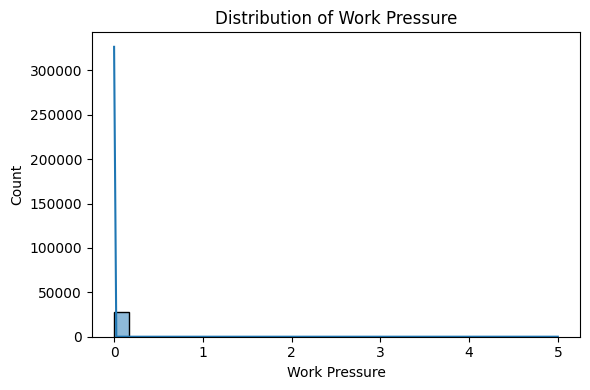

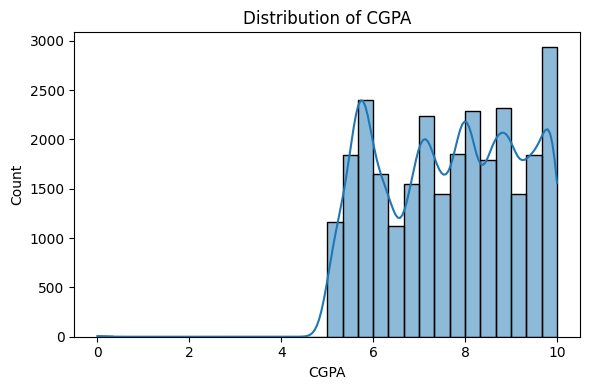

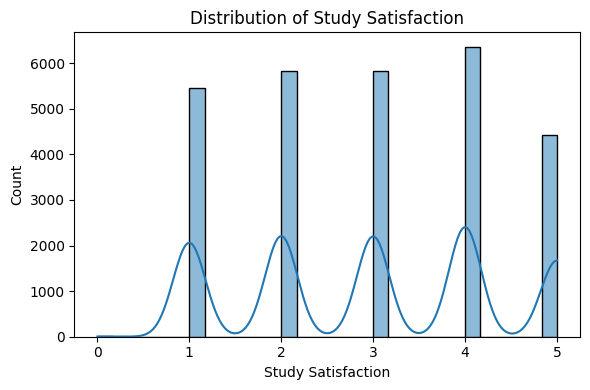

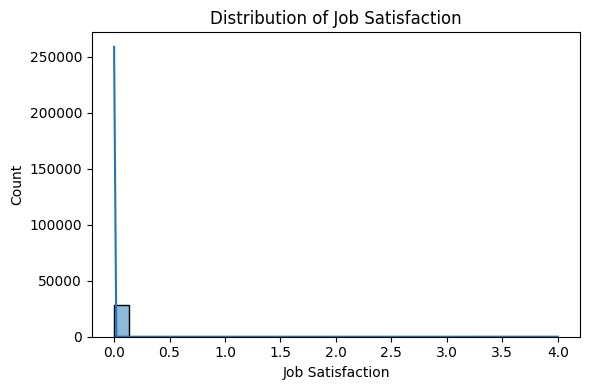

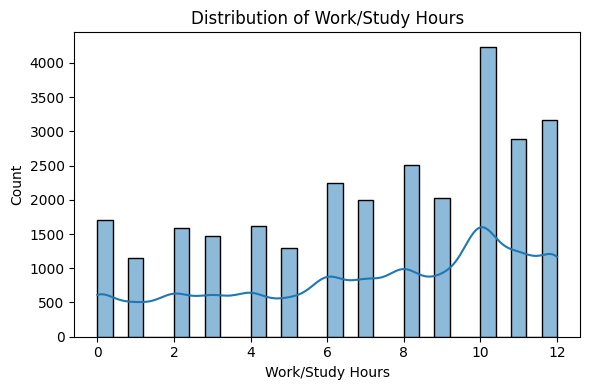

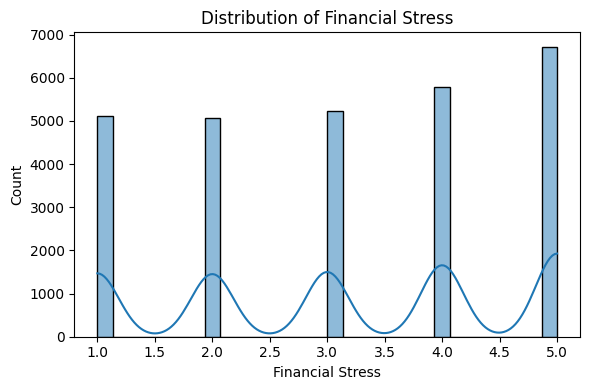

In [44]:
numeric = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
           'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

for col in numeric:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

##

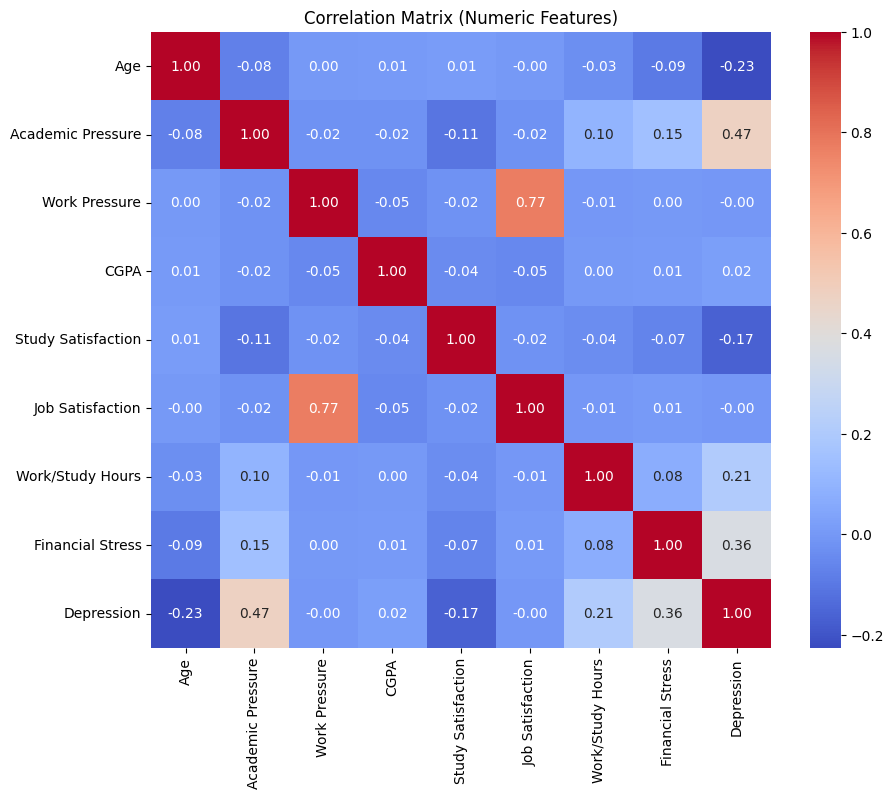

In [45]:
# Convert 'Financial Stress' to numeric, coercing errors to NaN
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

corr_matrix = df[numeric + ['Depression']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

##Depression vs. Categorical Features

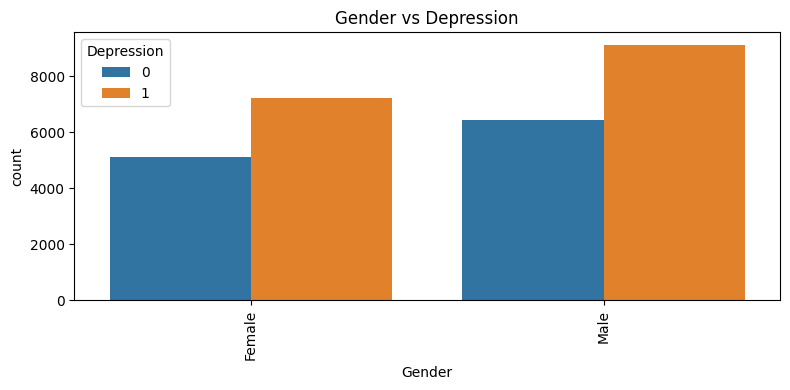

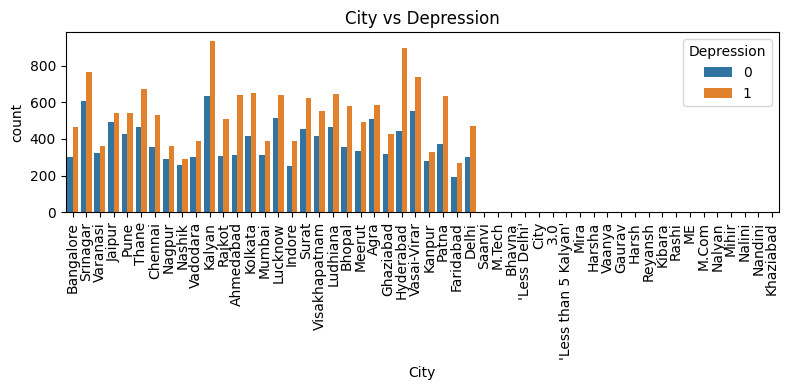

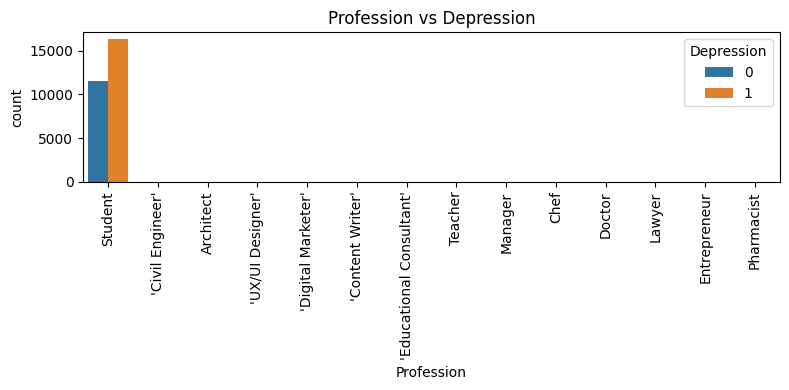

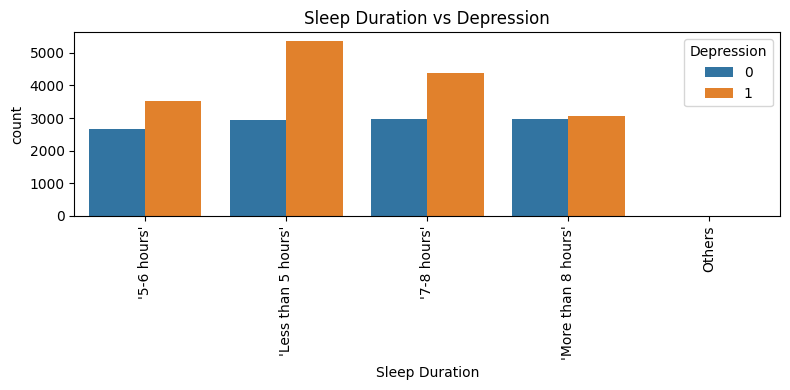

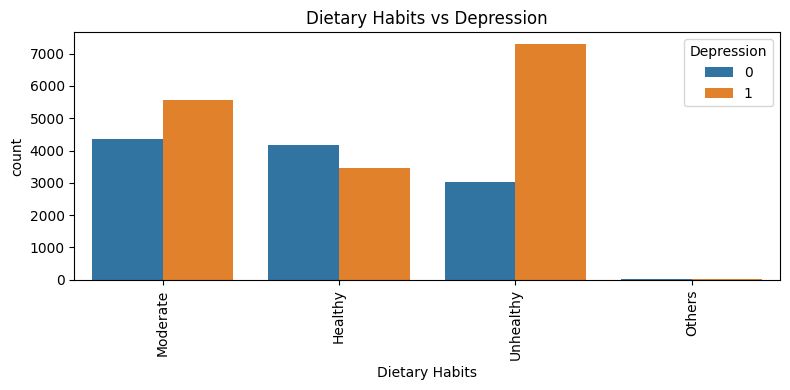

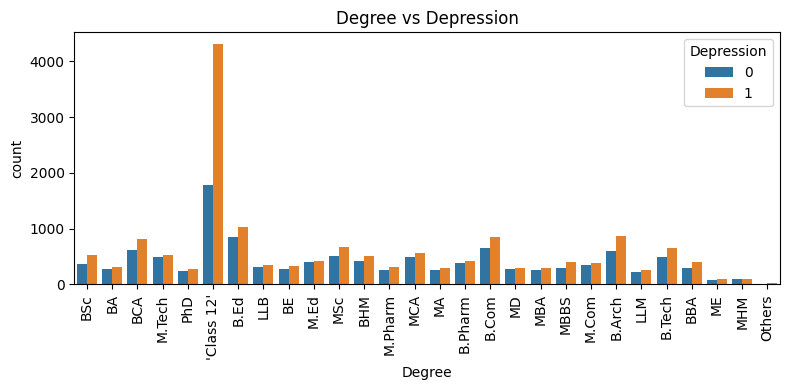

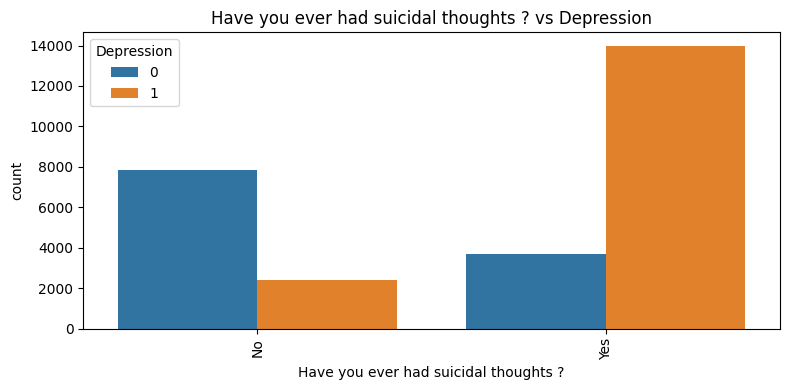

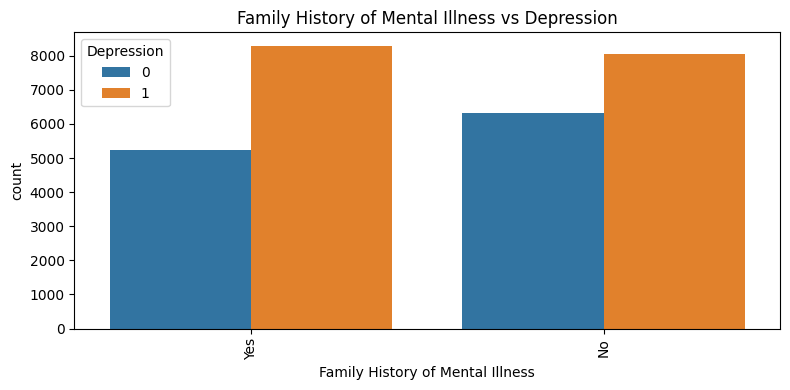

In [46]:
for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Depression')
    plt.title(f'{col} vs Depression')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## Handling Missing Values in Financial Stress

In [47]:
print("Missing in Financial Stress:", df['Financial Stress'].isnull().sum())
# Impute missing values in 'Financial Stress' with the median
median_financial_stress = df['Financial Stress'].median()
df['Financial Stress'] = df['Financial Stress'].fillna(median_financial_stress)

# Verify that there are no more missing values in 'Financial Stress'
print("Missing values after imputation:", df['Financial Stress'].isnull().sum())


Missing in Financial Stress: 0
Missing values after imputation: 0


In [48]:
# 1. Missing value analysis summary
print("=== MISSING VALUE SUMMARY ===")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

# 2. Key insights from your correlation matrix
print("=== TOP CORRELATIONS WITH DEPRESSION ===")
depression_corr = corr_matrix['Depression'].sort_values(key=abs, ascending=False)
print(depression_corr.drop('Depression'))

# 3. EDA Conclusions
print("=== EDA KEY FINDINGS ===")
print(f"Dataset shape: {df.shape}")
print(f"Depression rate: {df['Depression'].mean():.1%}")


=== MISSING VALUE SUMMARY ===
Series([], dtype: int64)
=== TOP CORRELATIONS WITH DEPRESSION ===
Academic Pressure     0.474816
Financial Stress      0.363638
Age                  -0.226478
Work/Study Hours      0.208604
Study Satisfaction   -0.167954
CGPA                  0.022184
Job Satisfaction     -0.003481
Work Pressure        -0.003350
Name: Depression, dtype: float64
=== EDA KEY FINDINGS ===
Dataset shape: (27900, 18)
Depression rate: 58.5%


# Data Preparation

In [35]:
# Handle missing values based on your EDA findings
# Example approach:
df_clean = df.copy()

# Handle Financial Stress missing values
df_clean['Financial Stress'] = df_clean['Financial Stress'].fillna(df_clean['Financial Stress'].median())

# Feature engineering examples:
df_clean['High_Academic_Pressure'] = (df_clean['Academic Pressure'] >= 4).astype(int)

# Map 'Sleep Duration' to a numerical representation of hours
sleep_hours_mapping = {
    "'Less than 5 hours'": 4,  # Representative value for less than 5 hours
    "'5-6 hours'": 5.5,        # Midpoint of the range
    "'7-8 hours'": 7.5,        # Midpoint of the range
    "'9-10 hours'": 9.5,       # Midpoint of the range
    "'More than 10 hours'": 11 # Representative value for more than 10 hours
}
df_clean['Sleep_Hours'] = df_clean['Sleep Duration'].map(sleep_hours_mapping)

# Create 'Poor_Sleep' feature based on the new 'Sleep_Hours' column
df_clean['Poor_Sleep'] = (df_clean['Sleep_Hours'] < 6).astype(int)


# Document all changes

# Investigative Analysis

In [55]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical features to test (excluding the target)
categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'Depression']

# Run chi-square test for each
print("Chi-square Test Results (vs Depression):\n")
for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['Depression'])
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"{col}: Chi2 = {chi2:.2f}, p = {p_value:.4f}")
    else:
        print(f"{col}: Not enough variation for test")


Chi-square Test Results (vs Depression):

Gender: Chi2 = 0.08, p = 0.7772
City: Chi2 = 187.99, p = 0.0000
Profession: Chi2 = 14.29, p = 0.3538
Sleep Duration: Chi2 = 276.90, p = 0.0000
Dietary Habits: Chi2 = 1203.15, p = 0.0000
Degree: Chi2 = 531.56, p = 0.0000
Have you ever had suicidal thoughts ?: Chi2 = 8323.25, p = 0.0000
Family History of Mental Illness: Chi2 = 79.52, p = 0.0000


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Select features (X) and target (y)
X = df_clean.drop('Depression', axis=1)
y = df_clean['Depression']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Handle potential remaining missing values after one-hot encoding by imputing with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=imputer.feature_names_in_) # Convert back to DataFrame to keep column names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("Logistic Regression:\n", classification_report(y_test, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      2261
           1       0.85      0.89      0.87      3319

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580



# Prepped Data Review

/tmp/ipython-input-51-3228025714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Depression', palette='Set2')


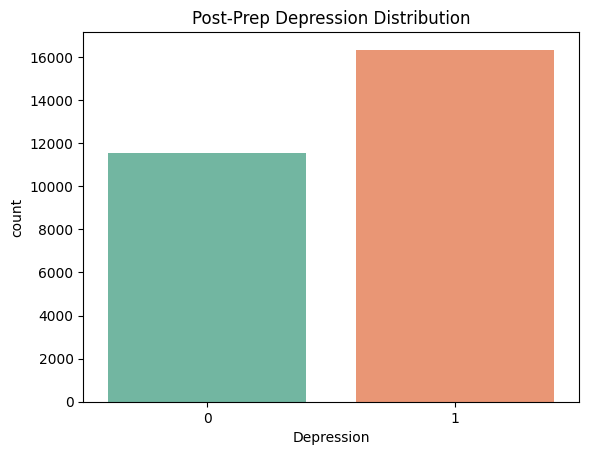

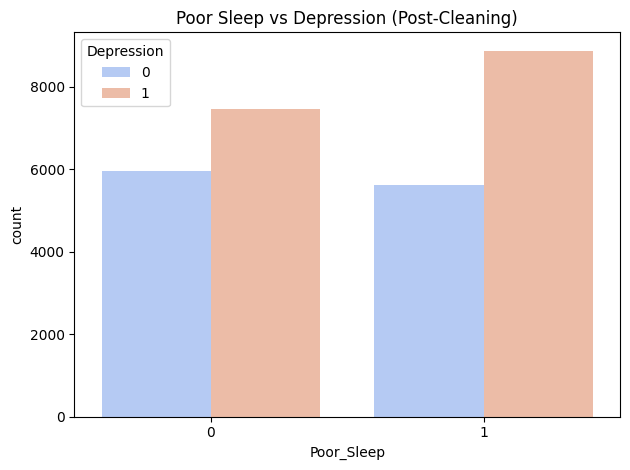

In [51]:
# Re-check depression distribution
sns.countplot(data=df_clean, x='Depression', palette='Set2')
plt.title("Post-Prep Depression Distribution")
plt.show()

# Spot-check one known feature relationship
sns.countplot(data=df_clean, x='Poor_Sleep', hue='Depression', palette='coolwarm')
plt.title("Poor Sleep vs Depression (Post-Cleaning)")
plt.xticks(rotation=0) # No rotation needed for binary x-axis
plt.tight_layout()
plt.show()